In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()


In [2]:
df = pd.read_csv("C:/Users/Deepthi/Desktop/srikar/tennis.csv")

In [3]:
le.fit(df['windy'].values)
df['windy'] = le.transform(df['windy'].values)

In [4]:
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,0,no
1,sunny,hot,high,1,no
2,overcast,hot,high,0,yes
3,rainy,mild,high,0,yes
4,rainy,cool,normal,0,yes


In [5]:
df.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [6]:
df.corr()

,windy
windy,1.0


In [7]:
df =pd.get_dummies(df,drop_first=True)

In [8]:
df.head()

,windy,outlook_rainy,outlook_sunny,temp_hot,temp_mild,humidity_normal,play_yes
0,0,0,1,1,0,0,0
1,1,0,1,1,0,0,0
2,0,0,0,1,0,0,1
3,0,1,0,0,1,0,1
4,0,1,0,0,0,1,1


In [11]:
x=df.drop('play_yes',axis=1).values
y=df['play_yes'].values

In [12]:
x

array([[0, 0, 1, 1, 0, 0],
       [1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 1, 1],
       [1, 0, 1, 0, 1, 1],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 1, 0]], dtype=int64)

In [13]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=uint8)

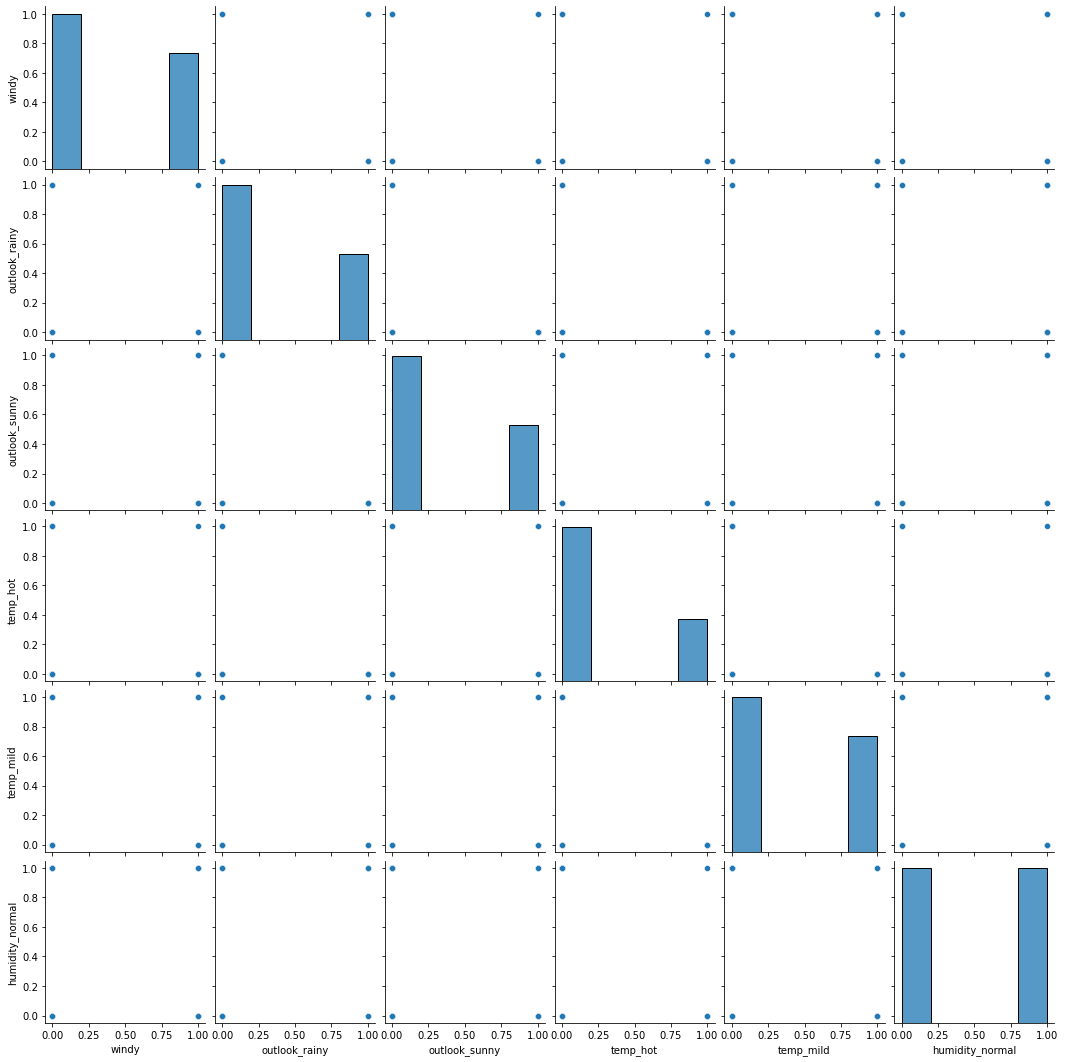

In [14]:
import seaborn as sns
sns.pairplot(df.iloc[:,:-1])

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [33]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()


In [34]:

model.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
model.score(x_train,y_train)

1.0

In [36]:
model.score(x_test,y_test)

0.4

In [28]:
y_pred=model.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score

In [31]:
csm = confusion_matrix(y_pred,y_test)
csm

array([[0, 3],
       [0, 2]], dtype=int64)

In [32]:
accuracy_score(y_test,y_pred)

0.4